Import packages

In [1]:
import pandas as pd
import matplotlib
import numpy as np

In [18]:
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

Read CSV file

In [2]:
netflix2 = pd.read_csv('netflix_titles.csv')

View some of the first views data rows

In [3]:
netflix2.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


There are a couple of things that we want to do to get the data ready for analysis: 

*create a new column recoding the ratings column into content for children and content for adults

*create new columns recoding the date_added column into the date added year and month of the Netflix offerings

First, we'll work on content

To find out all the different ratings offered, we'll look at the frequency counts

In [5]:
netflix2['rating'].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [6]:
def content (series):
    if series == "TV-MA" :
        return "adult"
    if series == "TV-14" :
        return "children"
    if series == "TV-PG" :
        return "children"
    if series == "R" :
        return "adult"
    if series == "PG-13" :
        return "children"
    if series == "NR" :
        return "adult"
    if series =="PG" :
        return "children"
    if series == "TV-Y7" :
        return "children"
    if series == "TV-G" :
        return "children"
    if series == "TV-Y" :
        return "children"
    if series == "TV-Y7-FV" :
        return "children"
    if series == "G" :
        return "children"
    if series == "UR" :
        return "adult"
    if series == "NC-17" :
        return "adult"

In [8]:
netflix2['Content'] = netflix2['rating'].apply(content)

Now that we've recoded, we'll create a bar graph of the new Content column

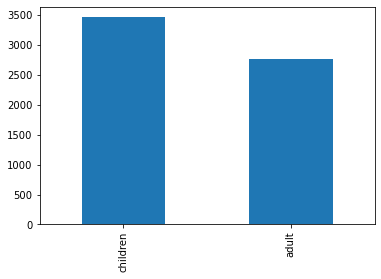

In [9]:
netflix2['Content'].value_counts().plot(kind = 'bar')

Later, when running analysis, we'll want to know about content over time, so we want to have the date_added column in a more useful format. 

To get started, we'll need to know the variable type of the date_added column info

In [10]:
netflix2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
 12  Content       6224 non-null   object
dtypes: int64(2), object(11)
memory usage: 633.3+ KB


We want to separate the date_added column into columns with the year and month, so we'll need the variable type as date-time

In [11]:
netflix2['date_added'] = pd.to_datetime(netflix2['date_added'])

In [12]:
netflix2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director      4265 non-null   object        
 4   cast          5664 non-null   object        
 5   country       5758 non-null   object        
 6   date_added    6223 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6224 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
 11  description   6234 non-null   object        
 12  Content       6224 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 633.3+ KB


Perfect! Now, we'll the year and month info into new columns

In [13]:
netflix2['date_added_Year'] = netflix2['date_added'].dt.year
netflix2['date_added_Month'] = netflix2['date_added'].dt.month

In [14]:
netflix2.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Content,date_added_Year,date_added_Month
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,children,2019.0,9.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,adult,2016.0,9.0


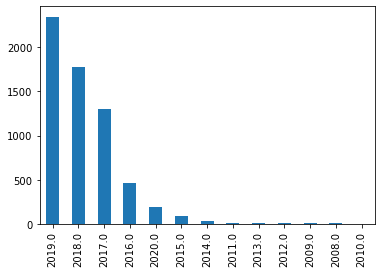

In [20]:
netflix2['date_added_Year'].value_counts().plot(kind = 'bar')